### 0. 참고논문
* 머신러닝 기반 음식점 추천시스템 설계 및 구현 - 최환석, 팽전, 이우섭 2020

### 1. Khaiii 설치
* !git clone https://github.com/kakao/khaiii.git
* !mkdir khaiii/build
* !cd khaiii/build; cmake ..
* !cd khaiii/build; make all
* !cd khaiii/build; make resource
* !cd khaiii/build; make package_python
* !cd khaiii/build/package_python; pip install .

### 2. 나눔폰트 설치
* !apt install fonts-nanum

#### [참고]
* 설치폴더: /usr/share/fonts/truetype/nanum
* download: !wget http://cdn.naver.com/naver/NanumFont/fontfiles/NanumFont_TTF_ALL.zip

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
# colab에서는 런타임 다시시작 필요
# ubuntu에서는 reboot

### 3. data 수정

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('데이터매쓰 영화 데이터 완성2.csv')
df = df.rename(columns={'남자 ': '남자.2'})
df = df[df.columns[:-20]]
df['네티즌'] = df['네티즌'].str.replace(r'(,)','.').astype(float)
df['관람객'] = df['관람객'].str.replace(r'(등록 전)','NaN').astype(float)
df['남자'] = df['남자'].str.replace(r'(등록 전)','NaN').astype(float)
df['여자'] = df['여자'].str.replace(r'(등록 전)','NaN').astype(float)
df['10대'] = df['10대'].str.replace(r'(등록 전)','NaN').astype(float)
df['20대'] = df['20대'].str.replace(r'(등록 전)','NaN').astype(float)
df['30대'] = df['30대'].str.replace(r'(등록 전)','NaN').astype(float)
df['40대'] = df['40대'].str.replace(r'(등록 전)','NaN').astype(float)
df['50대 이상'] = df['50대 이상'].str.replace(r'(등록 전)','NaN').astype(float)
df['영상미'] = df['영상미'].str.replace(r'(등록 전)','NaN').astype(float)
df['스토리'] = df['스토리'].str.replace(r'(등록 전)','NaN').astype(float)
df['연기'] = df['연기'].str.replace(r'(등록 전)','NaN').astype(float)
df['연출'] = df['연출'].str.replace(r'(등록 전)','NaN').astype(float)
df['남자.2'] = df['남자.2'].str.replace(r'(등록 전)','NaN').astype(float)
df['여자.2'] = df['여자.2'].str.replace(r'(등록 전)','NaN').astype(float)
df['10대.2'] = df['10대.2'].str.replace(r'(등록 전)','NaN').astype(float)
df['20대.2'] = df['20대.2'].str.replace(r'(등록 전)','NaN').astype(float)
df['30대.2'] = df['30대.2'].str.replace(r'(등록 전)','NaN').astype(float)
df['40대.2'] = df['40대.2'].str.replace(r'(등록 전)','NaN').astype(float)
df['50대 이상.2'] = df['50대 이상.2'].str.replace(r'(등록 전)','NaN').astype(float)


### 4. data 보기
* 75개의 열이 있음

In [5]:
df.shape

(100, 75)

In [6]:
df.head(1)

,순위,영화명,개봉일,매출액,관객수,스크린수,상영횟수,대표국적,국적,배급사,...,21,22,23,24,25,26,27,28,29,30
0,1,명량,2014-07-30,135757418810,17615686,1587,188720,한국,한국,(주)씨제이이엔엠,...,"""저는 명량을 보고 나서 처음 든 느낌은 ""이게 바로 영화의 매력이지!""라는 생각이...","영화 <명량>은 1597년, 단 12척의 배로 330척 왜군의 공격에 맞서 싸운 이...","명량, 백성이 있어야 나라가 있고, 나라가 있어야 임금이 있는 법이지 살고자 하면 ...","개봉한 지 약 7년만에 처음으로 명량을 보았다.\n\n늘 보고 싶었는데, 이번에 한...",광남이가 영화 명량을 통해 또 한번 느낀 점은 현재가 있을 수 있는 이유는 과거가 ...,너무나도 유명한 영화였지만 나는 이제야 보게 되었다. “노희영의 브랜딩 법칙”이라...,여러분 안녕하세요 행복한 수요일입니다~! 다들 즐거운 하루 보내고들 계신가요~?ㅎㅎ...,영화 명량은 조선시대 실존 인물인 이순신장군이 임진왜란때\n\n12척의 배로 330...,이 명량이라는 영화를 보고 내 머리에 남은 강렬한 기억은 구루지마의 머리를 이순신이...,조선을 대표해서 전쟁에 나가는 이순신장군과 일본을 대표해서 전쟁에 나가는\n구루지마...


In [7]:
df.columns

Index(['순위', '영화명', '개봉일', '매출액', '관객수', '스크린수', '상영횟수', '대표국적', '국적', '배급사',
       '장르', '관람객', '평론가', '네티즌', '남자', '여자', '10대', '20대', '30대', '40대',
       '50대 이상', 'OST', '영상미', '스토리', '연기', '연출', '남자.1', '여자.1', '10대.1',
       '20대.1', '30대.1', '40대.1', '50대 이상.1', 'OST.1', '영상미.1', '스토리.1',
       '연기.1', '연출.1', '남자.2', '여자.2', '10대.2', '20대.2', '30대.2', '40대.2',
       '50대 이상.2', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30'],
      dtype='object')

* 관람객 평가: '관람객', '남자', '여자', '10대', '20대', '30대', '40대', '50대 이상', 'OST', '영상미', '스토리', '연기', '연출'
* 평론가 평가: '평론가', '남자.1', '여자.1', '10대.1', '20대.1', '30대.1', '40대.1', '50대 이상.1', 'OST.1', '영상미.1', '스토리.1', '연기.1', '연출.1'
* 네티즌 평가: '네티즌', '남자.2', '여자.2', '10대.2', '20대.2', '30대.2', '40대.2', '50대 이상.2'
* 리뷰: '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'

### 5. 워드 클라우드

In [8]:
columns_review = [str(i) for i in range(1,31)]
print(columns_review)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']


* 각 행의 30개 리뷰를 하나의 문자열로 만든다.

In [11]:
texts = df.apply(lambda x: ' '.join([str(x[t]) for t in columns_review]),axis=1)
texts.shape

(100,)

* 리뷰에서 명사 추출하기

In [12]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

In [13]:
noun_all = []
for text in texts:
    noun = []
    for token in api.analyze(text):
        for x in token.morphs:
            if x.tag == 'NNG':
                noun.append(x.lex)
    noun_all.append(noun)

In [15]:
print(noun_all[:2])

[['영화', '최근', '개봉', '당시', '반감', '곳', '필름', '역사', '표', '후', '영화', '보게', '영화', '천만', '관객', '영화', '꼬리표', '달', '영화', '사실', '만약', '그때', '선입견', '필름', '새끼', '선', '한참', '선입견', '이새끼', '영화', '영화', '평가', '의식', '흐름', '영화', '보기전', '임진왜란', '복습', '명량', '해전', '구체', '전투', '장군', '왜놈새끼', '구체', '영화', '고증', '점수', '만약', '억지', '연출', '영화', '캐릭터', '묘사', '차원', '수', '모품', '거품', '영화', '실제', '말', '장군', '신급', '묘사', '명량', '해전', '장군', '해전', '이후', '후반', '전투', '전대미문', '팀킬', '죽음', '직전', '몸', '기간', '전쟁', '정신', '몸', '피폐', '상태', '유리', '상태', '수군', '원균', '씹새끼', '트롤짓', '함대', '대부분', '상태', '기', '밑바닥', '삼도수군', '통제사', '왜군', '명량', '상황', '배', '상대', '생각', '생각', '모두', '원균', '개새끼', '트롤짓', '환멸', '상황', '나라', '말', '장군', '상황', '완벽', '유도리', '원칙주의자', '군인', '명령', '전력', '생각', '혼자', '전선', '앞', '영화', '명량', '부분', '고증', '뒤', '혼자', '빵', '진짜', '역사', '영화', '말', '현실', '장군', '전', '해류', '왜쪽', '불리', '배', '배', '사망자', '침몰', '왜군', '후퇴', '다이묘', '존재', '공포', '자체', '전열', '전투', '사기', '바닥', '상태', '전쟁', '피폐', '왜놈', '명분', '전쟁', '마음', '다이묘', '본토', '지', '장군', '말', '

* noun_all을 하나의 문자열로 만들기

In [16]:
nounstr = ' '.join(sum(noun_all,[]))

* word cloud 만들기

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=font_path,background_color='white').generate(nounstr)

* wordcloud 그리기

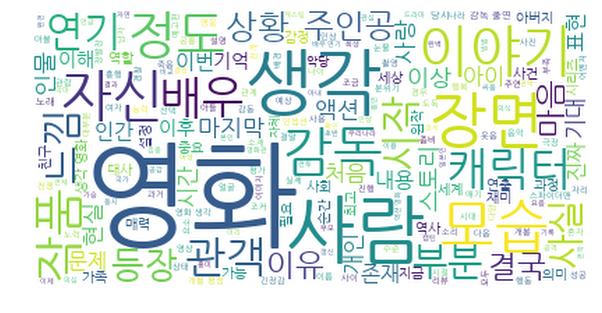

In [18]:
plt.figure(figsize=(10,8)) # 워드클라우드 크기 지정
plt.imshow(wordcloud, interpolation='lanczos') # 이미지의 부드럽기 정도
plt.axis('off') # x y 축과 숫자 제거
plt.show()

### 6. Document Term Matrix 만들기

* 한글자 단어 삭제하기

In [20]:
noun_all2 = [[x for x in each if len(x)>1] for each in noun_all]

* 여행지마다 하나의 문자열이 만들어지도록 한다.

In [34]:
np.unique([len(x) for t in noun_all2 for x in t])

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  34,  35,  36,  37,  38,  39,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  52,  53,  54,  58,  60,
        65,  66,  68,  72,  79,  88,  93,  99, 100, 104, 109, 115, 122,
       139, 198])

In [35]:
corpus = [' '.join(x) for x in noun_all2]
corpus[0]

'영화 최근 개봉 당시 반감 필름 역사 영화 보게 영화 천만 관객 영화 꼬리표 영화 사실 만약 그때 선입견 필름 새끼 한참 선입견 이새끼 영화 영화 평가 의식 흐름 영화 보기전 임진왜란 복습 명량 해전 구체 전투 장군 왜놈새끼 구체 영화 고증 점수 만약 억지 연출 영화 캐릭터 묘사 차원 모품 거품 영화 실제 장군 신급 묘사 명량 해전 장군 해전 이후 후반 전투 전대미문 팀킬 죽음 직전 기간 전쟁 정신 피폐 상태 유리 상태 수군 원균 씹새끼 트롤짓 함대 대부분 상태 밑바닥 삼도수군 통제사 왜군 명량 상황 상대 생각 생각 모두 원균 개새끼 트롤짓 환멸 상황 나라 장군 상황 완벽 유도리 원칙주의자 군인 명령 전력 생각 혼자 전선 영화 명량 부분 고증 혼자 진짜 역사 영화 현실 장군 해류 왜쪽 불리 사망자 침몰 왜군 후퇴 다이묘 존재 공포 자체 전열 전투 사기 바닥 상태 전쟁 피폐 왜놈 명분 전쟁 마음 다이묘 본토 장군 인용 응원 문구 정치 문구 해석 현수막 진정 금지 관련 디자인 올림픽 정신 국민 피해 자신 정치 목적 올림픽 이용 정부 일언반구 작금 사태 올림픽 시청 영속 패전 전쟁 패배 인정 지배 사회학자 이론 수준 수준 전문 학자 민주주의 정신 망각 패배 승리 기준 사회 평가 수준 문제 영속 패전 의미 파악 한국인 발광 방향 편향 사람 긍정 표현 우리나라 금기 이름 선전 조사 우리나라 좌적폐 행동 원칙 실체 관련 문제 불법 편입 영토 토의 입장 말그 좌익 입장 영속 패전 이론 미군 점령 상태 지배 지배 이분법 지구 팩트 점령 의미 냉전 시대 상황 동맹국 만약 경제 군사 차이 점령 논리 시대 제국주의 우생학 나치새끼 민주 정권 전범 정치 일본인 정치 혐오 허무주의 마음 우리나라 정치 와중 일본인 정신 소리 정치인 사람 환멸 좌우 지구 정의 바람 방향 정치 사람 입헌민주당 생각 강령 자유 민주 헌법 파괴 극우 강령 방향 영화 리뷰 얘기 공부 추측 손자 병법 격언 조금 장군 상대 상황 충성 절의 애국 왜군 생각 상대방 전력 파악 생각 조사 장군 마음 지기 백전 불태 

* 단어가 포함된 영화의 개수가 20에서 70까지인 단어들만 모아서 Document term matrix를 만든다.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    min_df=20,
    max_df=70,
    ngram_range=(1,1),
    lowercase=False,
    tokenizer=lambda x:x.split(' '))
# vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
print(X.shape) # (100, 7624)

(100, 1440)


* X를 numpy의 배열로 변환한다.

In [37]:
XX = X.toarray()

In [38]:
vectorizer.vocabulary_.keys()

dict_keys(['히어', '외모', '실체', '가치관', '상당', '강요', '감당', '내면', '찌질', '시즌', '사항', '거절', '미래', '상영관', '참고', '개봉작', '보호', '완성도', '별점', '대변', '시청', '짐작', '회사', '등장인물', '일종', '깊이', '그중', '스코어', '후회', '멜로', '제작비', '구석', '성향', '이입', '다큐', '기준', '일정', '집안', '단편', '일방', '플레이', '리얼리티', '호응', '형성', '연인', '속도감', '리더', '해외', '재현', '양심', '차지', '과언', '정점', '트랜스포머', '일관', '다큐멘터리', '위주', '판타지', '영광', '동일', '태도', '보단', '기획', '다짐', '형사', '출처', '예매', '동료', '계급', '볼거리', '절대', '결혼', '최대', '변신', '동네', '내년', '분노', '불행', '각각', '시험', '동원', '동반', '스케일', '선동', '여정', '연기파', '거짓', '일명', '시기', '사례', '애기', '연계', '발견', '작업', '이성', '처지', '기자', '메가박스', '민주주의', '충족', '신분', '요청', '장식', '리메이크', '여운', '개개인', '포스', '추적', '서비스', '화장실', '악당', '건물', '흑백', '지지', '특성', '공통점', '대학', '공포', '코드', '필자', '까닭', '몰입감', '지속', '상승', '자유', '압박', '블로그', '설득력', '깨알', '머릿속', '균형', '금지', '전국', '한정', '정체', '주관', '살인', '권선', '도구', '가미', '패배', '수상', '신경', '감상평', '상처', '각성', '하나하나', '남녀노소', '잠입', '비판', '선물', '라인업', '역활', '보편', '필수', '만점', '심판', '복장',

In [39]:
words = list(vectorizer.vocabulary_.keys())
freq = dict(zip(words,XX.sum(axis=1)))

In [40]:
wordcloud = WordCloud(font_path=font_path,background_color='white').generate_from_frequencies(freq)

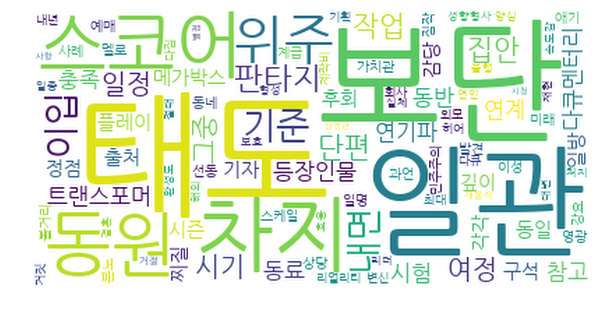

In [41]:
plt.figure(figsize=(10,8)) # 워드클라우드 크기 지정
plt.imshow(wordcloud, interpolation='lanczos') # 이미지의 부드럽기 정도
plt.axis('off') # x y 축과 숫자 제거
plt.show()

### 7. 불용어 제거

In [42]:
stopwords = ['보단', '차지', '위주', '메가박스', '예매', 'ㅋㅋ', '참고', '등장인물', ]

In [43]:
noun_all3 = [[x for x in each if x not in stopwords] for each in noun_all2]

In [50]:
corpus = [' '.join(x) for x in noun_all3]

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    min_df=20,
    max_df=70,
    ngram_range=(1,1),
    lowercase=True,
    tokenizer=lambda x:x.split(' '))
# vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
print(X.shape) # (100, 7624)

(100, 1432)


In [60]:
XX = X.toarray()

In [53]:
words = list(vectorizer.vocabulary_.keys())
freq = dict(zip(words,XX.sum(axis=1)))

In [54]:
wordcloud = WordCloud(font_path=font_path,background_color='white').generate_from_frequencies(freq)

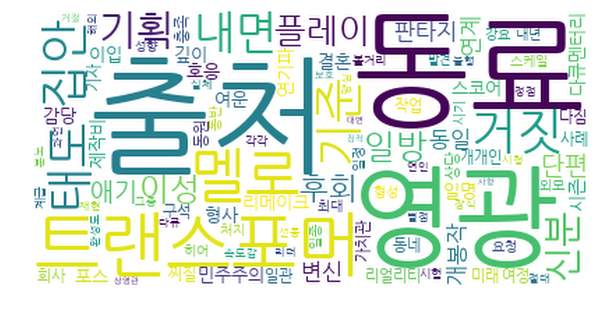

In [55]:
plt.figure(figsize=(10,8)) # 워드클라우드 크기 지정
plt.imshow(wordcloud, interpolation='lanczos') # 이미지의 부드럽기 정도
plt.axis('off') # x y 축과 숫자 제거
plt.show()

### 8. Tfidf 

https://ko.wikipedia.org/wiki/Tf-idf

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    min_df=20,
    max_df=70,
    ngram_range=(1,1),
    lowercase=True,
    tokenizer=lambda x:x.split(' '))
# vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
print(X.shape) # (100, 7624)

(100, 1432)


In [63]:
XX = X.toarray()

In [64]:
XX.shape

(100, 1432)

In [68]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=9,random_state=2)
km.fit(XX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [69]:
km.labels_

array([0, 3, 3, 0, 4, 8, 0, 5, 0, 8, 0, 5, 7, 0, 6, 0, 4, 4, 6, 3, 8, 8,
       0, 0, 6, 5, 4, 4, 5, 8, 7, 2, 3, 1, 0, 1, 0, 1, 1, 2, 0, 7, 5, 6,
       4, 0, 5, 5, 7, 3, 3, 7, 0, 1, 1, 5, 7, 7, 1, 7, 1, 8, 4, 7, 0, 0,
       0, 0, 7, 3, 4, 4, 3, 7, 7, 4, 0, 3, 7, 8, 0, 6, 6, 8, 1, 3, 4, 0,
       8, 7, 5, 6, 4, 2, 8, 0, 1, 7, 7, 8], dtype=int32)

In [70]:
n = 3
idx2 = km.labels_==n
df.loc[idx2,df.columns[:-20]][['영화명','장르','국적','매출액', '관객수', '스크린수', '상영횟수', '관람객', '평론가', '네티즌']]

,영화명,장르,국적,매출액,관객수,스크린수,상영횟수,관람객,평론가,네티즌
1,극한직업,코미디,한국,139655543516,16266338,2003,292816,9.20,6.80,8.50
2,신과함께-죄와 벌,"판타지, 드라마",한국,115727528087,14414658,1912,214631,8.73,5.92,7.83
19,기생충,드라마,한국,87460625095,10313163,1948,206398,9.07,9.06,8.48
32,공조,"액션, 드라마",한국,63783303326,7817654,1392,142991,8.83,5.00,8.27
49,범죄도시,액션,한국,56322153349,6880546,1315,149389,9.28,6.00,9.14
50,곡성,"미스터리, 스릴러, 드라마","한국,미국",55864308382,6879989,1485,130332,8.22,8.18,7.61
69,감시자들,"범죄, 액션, 스릴러",한국,39389732679,5509019,949,100349,NaN,7.13,7.76
72,검은 사제들,"미스터리, 드라마",한국,42412952592,5443232,1109,131179,8.55,6.23,8.32
77,완득이,드라마,한국,38533831000,5311353,629,117850,NaN,6.86,8.79
85,독전,"범죄, 액션",한국,43491590113,5064292,1532,140045,8.41,5.29,7.52


In [71]:
n = 2
idx2 = km.labels_==n
df.loc[idx2,df.columns[:-20]][['영화명','장르','국적','매출액', '관객수', '스크린수', '상영횟수', '관람객', '평론가', '네티즌']]

,영화명,장르,국적,매출액,관객수,스크린수,상영횟수,관람객,평론가,네티즌
31,스파이더맨: 파 프롬 홈,"액션, 모험, 코미디, SF",미국,69033177100,8023606,2142,181035,8.99,6.56,8.33
39,스파이더맨: 홈커밍,"액션, 모험, SF",미국,59125813820,7258678,1965,164448,8.83,7.00,8.36
93,어메이징 스파이더맨,"액션, 모험, 스릴러",미국,41165656235,4853273,1118,92766,NaN,6.70,7.75
